In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [7]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 40.2MB/s]


In [8]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [9]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [11]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's go on now -**
**DC v CSK-  Q1**

In [13]:
data.batting_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data.bowling_team.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [14]:
data2.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [15]:
data2.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)
data2.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},inplace=True)

In [16]:
data_f = data2.loc[data2.team1.isin(['Delhi Capitals', 'Chennai Super Kings'])] 
data_f = data_f.loc[data_f.team2.isin(['Delhi Capitals', 'Chennai Super Kings'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
78,79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Delhi Capitals,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk",BF Bowden,K Hariharan,NaN
86,87,2008,Delhi,2008-05-08,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN
124,125,2009,Durban,2009-04-23,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Delhi Capitals,9,0,AB de Villiers,Kingsmead,BR Doctrove,SJA Taufel,NaN
140,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium,DJ Harper,RE Koertzen,NaN
184,185,2010,Delhi,2010-03-19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,5,ML Hayden,Feroz Shah Kotla,BR Doctrove,SK Tarapore,NaN
223,224,2010,Chennai,2010-04-15,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Delhi Capitals,0,6,G Gambhir,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,SS Hazare,NaN
288,289,2011,Chennai,2011-05-12,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Chennai Super Kings,18,0,MS Dhoni,"MA Chidambaram Stadium, Chepauk",AM Saheba,SL Shastri,NaN
317,318,2012,Delhi,2012-04-10,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,8,M Morkel,Feroz Shah Kotla,Asad Rauf,SK Tarapore,NaN
363,364,2012,Chennai,2012-05-12,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,9,BW Hilfenhaus,"MA Chidambaram Stadium, Chepauk",S Das,BR Doctrove,NaN
379,380,2012,Chennai,2012-05-25,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN


Finally , We have got a complete dataset for all the matches of  DC VS CSK

**Let's do Q1 now**

CSK Wins - 15
DC Wins - 6


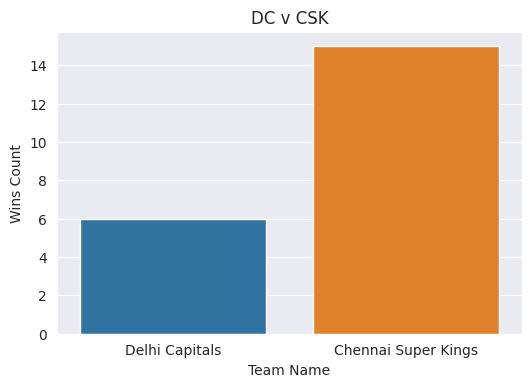

In [18]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('DC v CSK')
A,B =data_f.winner.value_counts()

print('CSK Wins -',A)
print('DC Wins -',B)

plt.show()


DC has been quite poor against CSK. Let's support CSK considering overall performance

**Let's do Q2 now**

**Finding average CSK runs v DC**

In [20]:
data_s = data.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_s = data_s.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18372,79,1,Chennai Super Kings,Delhi Capitals,1,1,PA Patel,SP Fleming,GD McGrath,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
18373,79,1,Chennai Super Kings,Delhi Capitals,1,2,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18374,79,1,Chennai Super Kings,Delhi Capitals,1,3,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18375,79,1,Chennai Super Kings,Delhi Capitals,1,4,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18376,79,1,Chennai Super Kings,Delhi Capitals,1,5,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [23]:
data_s.match_id.nunique() # Should be 21 matchs

21

In [24]:
data_s.total_runs.sum() # Total runs of CSK v DC

3442

In [25]:
np.round(3442/21,2) # Average runs of CSK v DC 


163.9

Let us find average runs from past 2 seasons

In [27]:
data_sd = data.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_sd = data_sd.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_sd = data_sd.loc[data.match_id.isin(['7923','7945','11141','11341','11414'])]
data_sd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
157352,7923,1,Chennai Super Kings,Delhi Capitals,1,1,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
157353,7923,1,Chennai Super Kings,Delhi Capitals,1,2,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
157354,7923,1,Chennai Super Kings,Delhi Capitals,1,3,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
157355,7923,1,Chennai Super Kings,Delhi Capitals,1,4,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
157356,7923,1,Chennai Super Kings,Delhi Capitals,1,5,F du Plessis,SR Watson,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178825,11414,2,Chennai Super Kings,Delhi Capitals,19,2,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
178826,11414,2,Chennai Super Kings,Delhi Capitals,19,3,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178827,11414,2,Chennai Super Kings,Delhi Capitals,19,4,MS Dhoni,AT Rayudu,I Sharma,0,0,0,0,0,0,0,0,0,MS Dhoni,caught,K Paul
178828,11414,2,Chennai Super Kings,Delhi Capitals,19,5,AT Rayudu,DJ Bravo,I Sharma,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [28]:
data_sd.match_id.nunique() # Should be 5 matches

5

Means they played a play off match in one of the last 2 season

In [29]:
data_sd.total_runs.sum() # Total runs in last 5 matches

853

In [30]:
np.round(853/5,2)

170.6

Considering this let's mark 166-175 there.

**For Q3, Let's find average wickets taken by CSK in 15-20 overs v DC**

In [40]:
data_n = data.loc[data.bowling_team.isin(['Chennai Super Kings'])]
data_n = data_n.loc[data.batting_team.isin(['Delhi Capitals'])]
data_n = data_n.loc[(data_n.over >=15) & (data_n.over<=20)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
18585,79,2,Delhi Capitals,Chennai Super Kings,15,1,AB de Villiers,G Gambhir,MS Gony,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
18586,79,2,Delhi Capitals,Chennai Super Kings,15,2,AB de Villiers,G Gambhir,MS Gony,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
18587,79,2,Delhi Capitals,Chennai Super Kings,15,3,G Gambhir,AB de Villiers,MS Gony,0,0,0,0,0,0,0,0,0,G Gambhir,bowled,NaN
18588,79,2,Delhi Capitals,Chennai Super Kings,15,4,S Dhawan,AB de Villiers,MS Gony,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
18589,79,2,Delhi Capitals,Chennai Super Kings,15,5,S Dhawan,AB de Villiers,MS Gony,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178709,11414,1,Delhi Capitals,Chennai Super Kings,20,2,TA Boult,A Mishra,RA Jadeja,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
178710,11414,1,Delhi Capitals,Chennai Super Kings,20,3,TA Boult,A Mishra,RA Jadeja,0,0,0,0,0,0,0,0,0,TA Boult,bowled,NaN
178711,11414,1,Delhi Capitals,Chennai Super Kings,20,4,I Sharma,A Mishra,RA Jadeja,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178712,11414,1,Delhi Capitals,Chennai Super Kings,20,5,I Sharma,A Mishra,RA Jadeja,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [41]:
data_n.player_dismissed.value_counts().sum() # Wickets lost by DC v CSK between 15-20 overs

48

In [42]:
data_n.match_id.nunique() 

20

It means Delhi were bowled out before 15 overs in one of the match

In [43]:
np.round(48/20,2) # Average Wickets lost by DC v CSK in last 5 overs

2.4

Let's mark 0-2 there considering our analysis

**Let's do Q4**

**Let's find balls faced by CSK to score 100 runs in last 2 seasons**

In [59]:
data_c = data.loc[data.bowling_team.isin(['Delhi Capitals'])]
data_c = data_c.loc[data.batting_team.isin(['Chennai Super Kings'])]
data_c = data_c.loc[data.match_id.isin(['7923','7945','11141','11341','11414'])]
data_c = data_c.loc[(data.over <=12)]
data_c

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
157352,7923,1,Chennai Super Kings,Delhi Capitals,1,1,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
157353,7923,1,Chennai Super Kings,Delhi Capitals,1,2,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
157354,7923,1,Chennai Super Kings,Delhi Capitals,1,3,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
157355,7923,1,Chennai Super Kings,Delhi Capitals,1,4,SR Watson,F du Plessis,TA Boult,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
157356,7923,1,Chennai Super Kings,Delhi Capitals,1,5,F du Plessis,SR Watson,TA Boult,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178783,11414,2,Chennai Super Kings,Delhi Capitals,12,3,SR Watson,SK Raina,K Paul,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178784,11414,2,Chennai Super Kings,Delhi Capitals,12,4,SK Raina,SR Watson,K Paul,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178785,11414,2,Chennai Super Kings,Delhi Capitals,12,5,SR Watson,SK Raina,K Paul,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
178786,11414,2,Chennai Super Kings,Delhi Capitals,12,6,SR Watson,SK Raina,K Paul,0,1,0,0,0,0,1,1,2,NaN,NaN,NaN


In [60]:
data_c.total_runs.sum() # Average runs in less than and equal to 12 overs


496

In [61]:
np.round(496/5,2) 

99.2

Clearly CSK will take more than 12 overs to make 100 runs
Let's mark 71+ there

**Let's do Q5 now**

**Let's find average no ball runs in DC v CSK**

In [62]:
data_sd.noball_runs.sum()

3

In [65]:
np.round(3/5,2)

0.6

Let's mark 0-1 there

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

